<a href="https://colab.research.google.com/github/prouser001/wilsonet_ai-ml-demo-code-activities-2024/blob/main/Milk_Tea_and_ML_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

## This problem is based on the College data set. This data set has statistics for 777 US Colleges from the 1995 issue of US News and World Report. You can find the description of this data set at https://rdrr.io/cran/ISLR/man/College.html.1 Let us first create a variable of acceptance rate, Accept.Rate, that is the number of applications accepted (Accept) divided by the number of applications received (Apps). We will now try to predict the acceptance rate using all variables other than Accept and Apps. We can remove Accept and Apps from the data frame.

### Importing Data and Packages

In [ ]:
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ISLP import load_data

data = load_data('College')

In [ ]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Data Prep

In [ ]:
data['Accept.Rate'] = data['Accept'] / data['Apps']

In [ ]:
print("Number of null values:", data["Accept.Rate"].isnull().sum())

Number of null values: 0


#### **In order for the model to run properly, we must convert the 'Private' variable to binary (0,1)**

#### Finish to code snippet below to convert the Private variable:

In [ ]:
data['Private'] = data['Private'].replace({'Yes': 1, 'No': 0})

#### **Since we are using the 'Apps' and 'Accepts' columns to calculate to what we will be predicted (Accept.Rate), we need to delete the columns from the dataset as keeping them will be costly to our prediction.**

#### Finish the code snippet below to drop the 'Apps' and 'Accepts' columns:

In [ ]:
data = data.drop(columns=['Apps', 'Accept'])

In [ ]:
print(data.shape)

In [ ]:
data.head()

,Private,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Accept.Rate
0,1,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.742169
1,1,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.880146
2,1,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.768207
3,1,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0.836930
4,1,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0.756477


### Spitting Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
test_size = int(data.shape[0] * 0.2)
train_size = data.shape[0] - test_size
data_train, data_test = train_test_split(data, test_size=test_size, random_state=0)

In [ ]:
print(data_train.shape)
print(data_test.shape)

(622, 17)
(155, 17)


#### **Now it's time to make the training and testing datasets! Remember, we must drop the target variable from the training dataset containing the feature variables.**

Finish typing the code snippets below to make the training and testing datasets:

In [ ]:
X_train = data_train.drop(columns=["Accept.Rate"])
y_train = data_train[['Accept.Rate']]

In [ ]:
X_test = data_test.drop(columns=["Accept.Rate"])
y_test = data_test[['Accept.Rate']]

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Linear Regression Train
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Linear Regression Test
y_lm_pred_test = lm.predict(X_test)

In [ ]:
# Calculate the Test MSE
test_mse = mean_squared_error(y_test, y_lm_pred_test)

In [ ]:
print("Test Error (MSE) with Linear Regression:", test_mse)

Test Error (MSE) with Linear Regression: 0.016312523851000404


### Plot the Original Values vs. Predicted Values

In [ ]:
import seaborn as sns

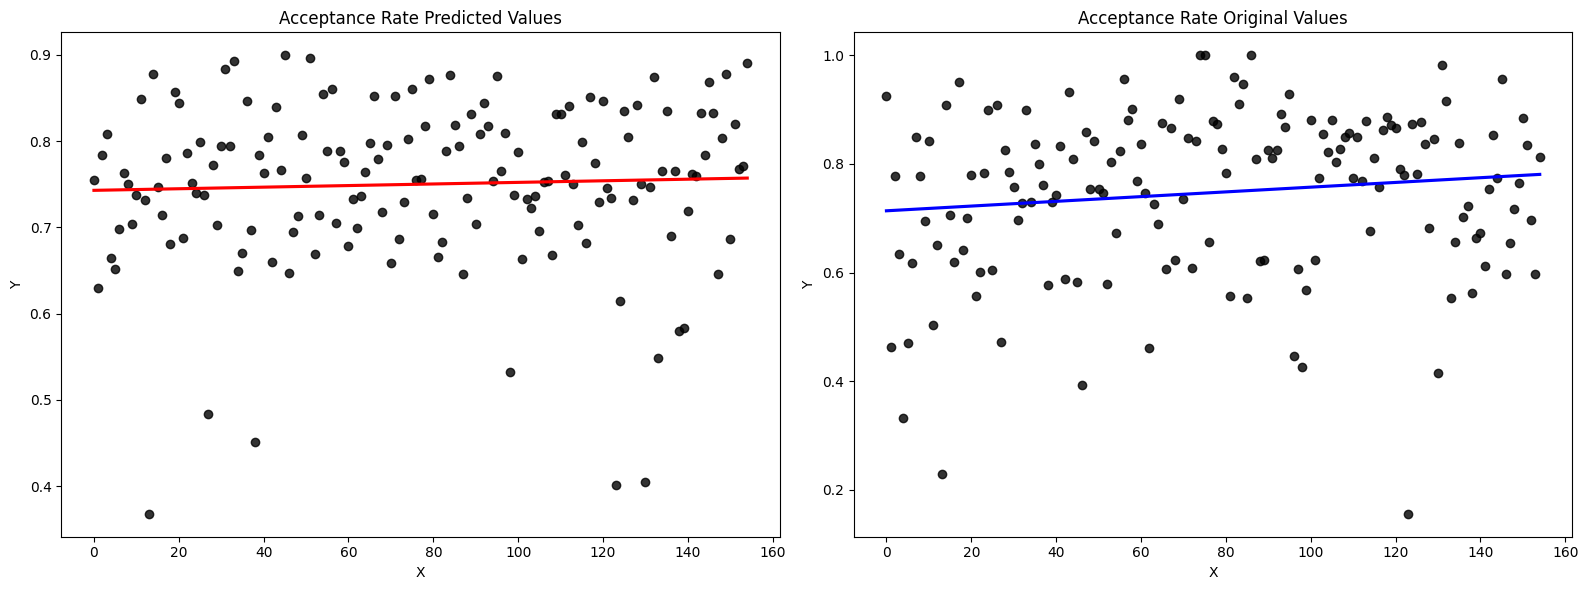

In [ ]:
# Create a DataFrame for plotting with Seaborn for y_lm_pred_test
sim_df_pred = pd.DataFrame({'X': np.arange(len(y_lm_pred_test)), 'Y': y_lm_pred_test.flatten()})

# Create a DataFrame for plotting with Seaborn for y_test
sim_df_test = pd.DataFrame({'X': np.arange(len(y_test)), 'Y': y_test.values.flatten()})

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot for y_test
sns.regplot(data=sim_df_test, x='X', y='Y', ci=0, scatter_kws={"color": "black"}, line_kws={"color": "blue"}, ax=axes[1])
axes[1].set_title('Acceptance Rate Original Values')

# Plot for y_lm_pred_test
sns.regplot(data=sim_df_pred, x='X', y='Y', ci=0, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axes[0])
axes[0].set_title('Acceptance Rate Predicted Values')

# Adjust layout
plt.tight_layout()
plt.show()